In [1]:
import sys
sys.path.append('..')
from preproccessing import AudioPreprocessor

/home/ffrankusha/study/university/classifier_of_sound_sources_it_clinic_2024/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import IPython.display as ipd

# Данные

In [30]:
files = os.listdir('data/examples')

In [32]:
ipd.Audio(f'data/examples/{files[1]}')

# Загрузка

In [56]:
example_filepath = f'data/examples/{files[1]}'

example = AudioPreprocessor()
example.load_audio(file_path=example_filepath)

In [35]:
y, sr = example.return_audio()
print(type(y), y.shape)
y, sr

<class 'numpy.ndarray'> (220500,)


(array([-0.44656372, -0.4701233 , -0.4803772 , ..., -0.06384277,
        -0.05136108, -0.04431152], dtype=float32),
 44100)

# Визуализация

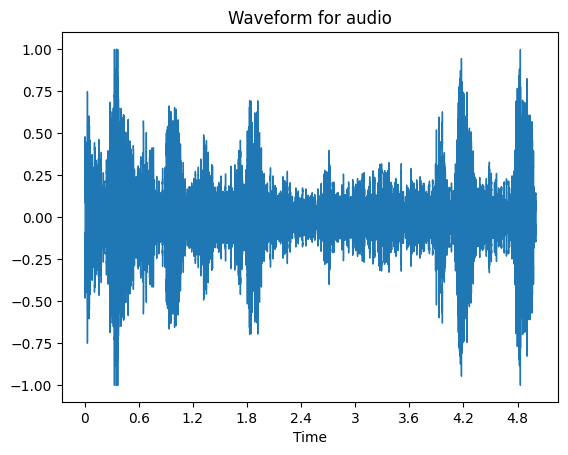

In [36]:
example.display_waveform()

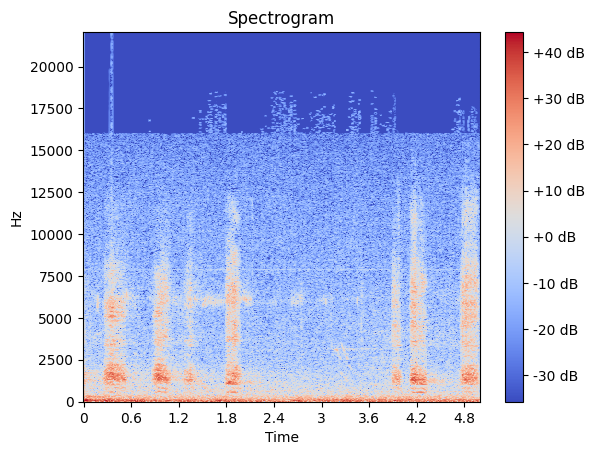

In [37]:
example.display_spectrogram()

# Предобработка

### Нормализация

In [38]:
ts, sr = example.return_audio()
print(ts.min(), ts.max())
print(ts)

normalized = example.normalize(method='peak')
normalized.save_audio('data/normalized_peak.wav')
normalized_peak, _ = normalized.return_audio()
print('peak')
print(normalized_peak.min(), normalized_peak.max())
print(normalized_peak)

normalized = example.normalize(method='rms')
normalized.save_audio('data/normalized_rms.wav')
normalized_rms, _ = normalized.return_audio()
print('rms')
print(normalized_rms.min(), normalized_rms.max())
print(normalized_rms)

-0.94558716 0.9999695
[-0.44656372 -0.4701233  -0.4803772  ... -0.06384277 -0.05136108
 -0.04431152]
peak
-0.945616 1.0
[-0.44657734 -0.47013763 -0.48039186 ... -0.06384473 -0.05136265
 -0.04431288]
rms
-0.69437855 0.7343134
[-0.32792774 -0.34522837 -0.3527582  ... -0.04688204 -0.03771628
 -0.03253954]


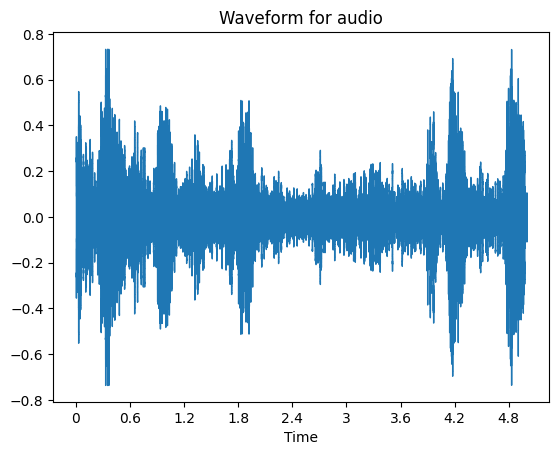

In [39]:
normalized.display_waveform()

In [40]:
ipd.Audio(f'data/normalized_rms.wav')

In [41]:
ipd.Audio(f'data/normalized_peak.wav')

### Эквализация

In [42]:
equalized = example.equalize()
ts, sr = equalized.return_audio()

equalized.save_audio('data/equalized.wav')
print(ts.min(), ts.max(), ts.shape)
# AudioPreprocessor(sr=sr, audio = equalized).display_waveform()

-1.0125195004432306 1.0442292076166697 (220500,)


In [43]:
ipd.Audio('data/equalized.wav')

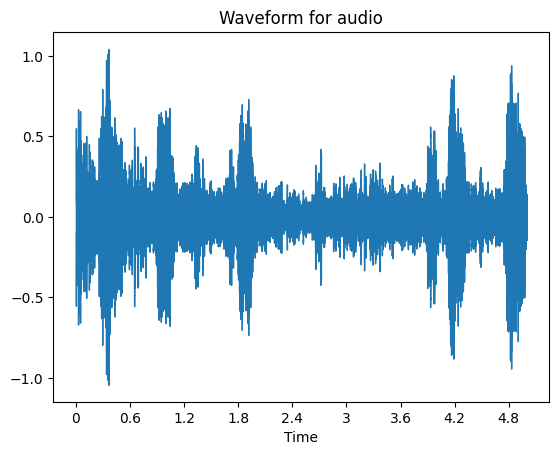

In [44]:
equalized.display_waveform()

### Обнаружение и удаление шума

In [45]:
for m in ['amplitude', 'silence', 'frequency']:
    print(m, ':', example.detect_noise_section(method=m, threshold=0.1, noise_duration=2))

amplitude : (np.float64(0.0004761904761904762), np.float64(2.0004761904761903))
silence : (0, 2)
frequency : (0.0, 2.0)


(220500,)


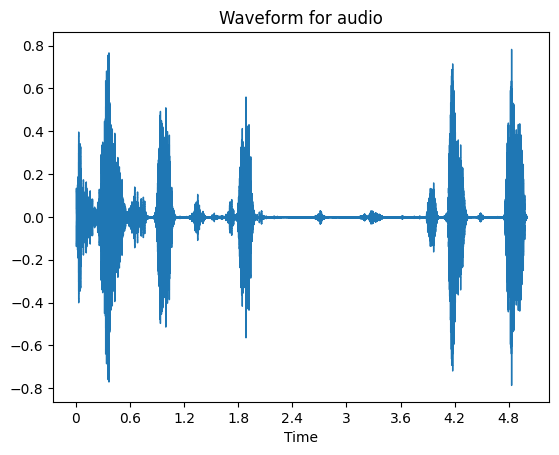

In [46]:
s, e = example.detect_noise_section(method='amplitude', threshold=0.1, noise_duration=2)
denoised = example.remove_noise(noise_start=s, noise_end=e)

ts, sr = denoised.return_audio()
print(ts.shape)

denoised.display_waveform()

In [47]:
denoised.save_audio('data/denoised.wav')

In [49]:
ipd.Audio('data/denoised.wav')

### Preemphasis

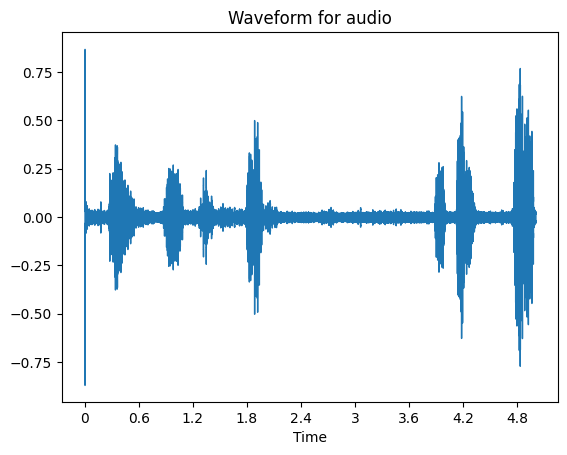

In [57]:
preemphasised = example.preemphasis()
preemphasised.save_audio('data/preemphasised.wav')
preemphasised.display_waveform()

In [58]:
ipd.Audio('data/preemphasised.wav')

### Trim

In [50]:
ipd.Audio(f'data/examples/{files[0]}')

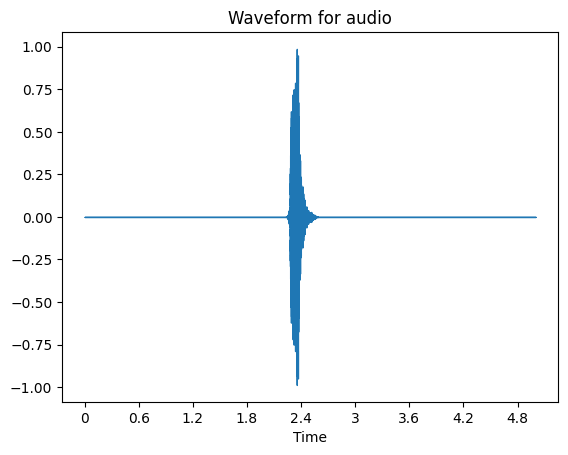

In [51]:
example_filepath = f'data/examples/{files[0]}'

example = AudioPreprocessor()
example.load_audio(file_path=example_filepath)

example.display_waveform()

In [52]:
trimmed = example.trim()
trimmed.save_audio('data/trimmed.wav')

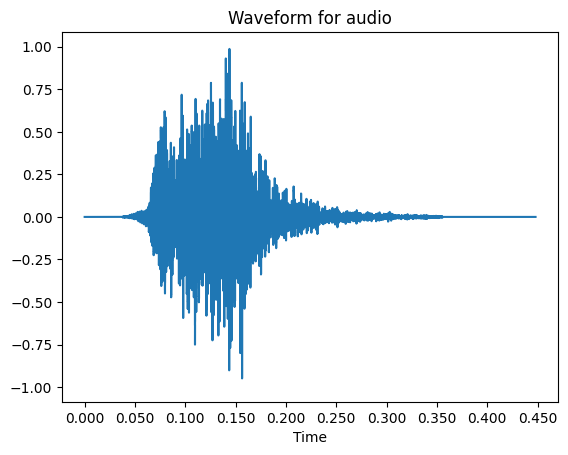

In [53]:
trimmed.display_waveform()

In [54]:
ipd.Audio('data/trimmed.wav')